<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/CH04_SEC03_1_OverUnderDetermined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 18})

In [3]:
# Underdetermined
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

def two_norm(x):
    return np.linalg.norm(x,ord=2)

constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)
x2 = res.x

def one_norm(x):
    return np.linalg.norm(x,ord=1)

res = minimize(one_norm, x0, method='SLSQP',constraints=constr)
x1 = res.x

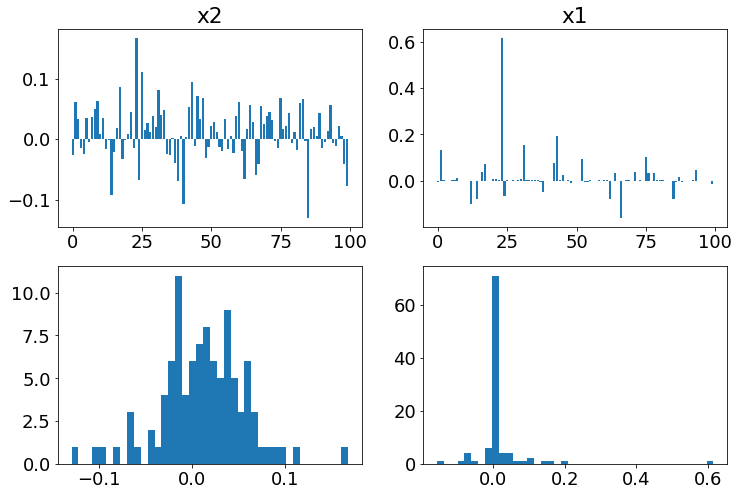

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)


plt.show()

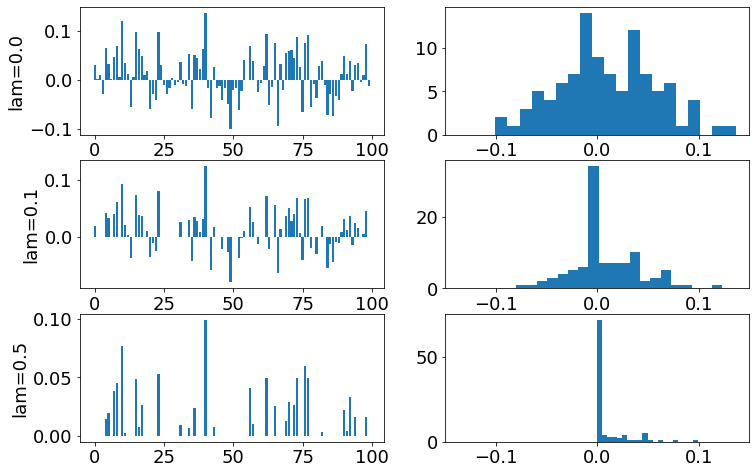

In [5]:
# Overdetermined
n = 500
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

xdag = np.linalg.pinv(A)@b

lam = np.array([0, 0.1, 0.5])



def reg_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)

fig,axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm,args=(A,b,lam[j]),x0=xdag)
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)


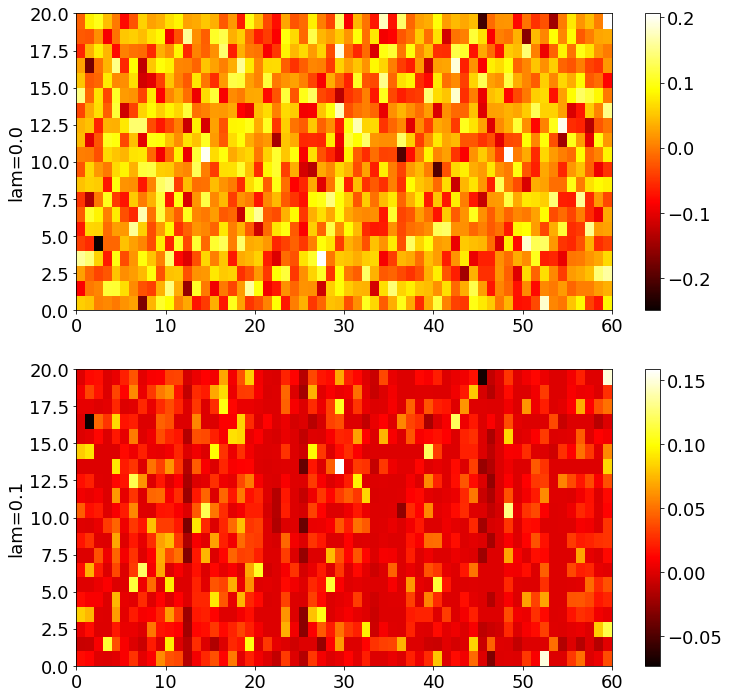

In [6]:
## Matrix Overdetermined System
plt.rcParams['figure.figsize'] = [12, 12]

# overdetermined
n = 300
m = 60
p = 20
A = np.random.rand(n,m)
b = np.random.rand(n,p)
lam = np.array([0,0.1])

xdag = np.linalg.pinv(A)@b
xdag = xdag.reshape(-1)

def reg_norm_2d(x,A,b,lam,m,p):
    # scipy minimize() does not accept multidimensional x
    # To get around this, we pass x as a vector and reshape it
    x = np.reshape(x,(m,p))
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)


fig,axs = plt.subplots(len(lam),1)
for j in range(len(lam)):
    res = minimize(reg_norm_2d,args=(A,b,lam[j],m,p),x0=xdag)
    x = res.x
    x = x.reshape(m,p)
    x_pcolor = axs[j].pcolor(x.T,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel('lam='+str(lam[j]))
    
plt.show()